In [2]:
import pandas as pd

# Load the CSV files
task1_df = pd.read_csv('task1.csv')
task2_df = pd.read_csv('task2_modified.csv')
labels_df = pd.read_csv('label.csv')

In [3]:

# Standardize the labels in the labels dataframe
label_mapping = {
    'Stop': 'Slow-Stop',
    'Left turn': 'Left Turn',
    'Left lane change': 'Left Lane Change',
    'Right turn': 'Right Turn',
    'Slow': 'Slow-Stop'
}

In [4]:

labels_df['Maneuver label'] = labels_df['Maneuver label'].replace(label_mapping)

In [5]:
labels_df

,Video name,Maneuver label
0,00d5a64d-7e78-4662-9f00-c2a7c69cace8,Slow-Stop
1,0db072f3-d123-44cb-9edf-23dbdad3ccac,Straight
2,0f388736-f574-449e-9ab7-4cfa531a6b51,Right Turn
3,1d98d9d5-ad45-46ff-b3c2-f22546b2a7e3,Straight
4,1e842859-77da-4601-86b1-a2a2942003dd,Right Turn
...,...,...
296,11b727b1-e4a6-46bc-92b4-6689cf2ca09e,Right Turn
297,18ec8b70-5dfa-4377-84b9-048155001141,Right Turn
298,49ab74ee-0433-4ec2-8cf1-5331034918f9,Right Turn
299,88e343f7-71e6-460b-997b-67020023567d,Right Turn


In [6]:

# Remove file extensions in predictions dataframes for comparison
task1_df['filename'] = task1_df['filename'].str.replace('.npy', '')
task2_df['filename'] = task2_df['filename'].str.replace('.npy', '')

In [7]:
task1_df

,filename,Right Lane Change,Straight,Left Turn,Slow-Stop,Right Turn,Left Lane Change
0,bd0e6ef3-0ee3-42d2-ba89-87e27f31da87,0,0,0,1,0,0
1,b8cf26e4-7329-4cfa-aca7-00bd40975ff0,1,0,0,0,0,0
2,60ad70f9-ecde-4f47-87ec-41bbc1221d94,0,0,0,1,0,0
3,7d43bedb-13c3-4b9d-9050-f1652b110a1e,0,0,1,0,0,0
4,dec19835-0fb4-4887-8178-19df3b497153,0,0,0,1,0,0
...,...,...,...,...,...,...,...
294,004ed8d4-5be9-4963-bdb3-8aace317cd74,0,0,1,0,0,0
295,f480e49c-ac72-4cda-a0c3-7aa3c48f592b,0,0,1,0,0,0
296,7612fbfb-910c-440b-9093-4d09a2c8db6a,0,0,1,0,0,0
297,2b045312-775d-4005-92ad-760f39e29637,0,1,0,0,0,0


In [8]:
task2_df

,Unnamed: 0,filename,Right Lane Change,Straight,Left Turn,Slow-Stop,Right Turn,Left Lane Change
0,0,30b2c119-7f65-4791-afc4-93bbd8a2592f,0,0,0,1,0,0
1,1,824ecb50-b77b-4bb3-bf79-98f87a51c42f,0,0,1,0,0,0
2,2,08fad321-94d6-4a5d-9203-4b76e0e26589,0,0,0,0,1,0
3,3,e50fdbad-6817-4439-b7c0-97ae63bac3cc,0,0,0,1,0,0
4,4,a7aa14d4-c451-4968-8585-89281f99a4ec,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
294,294,d454d3c6-efd5-4d53-bd6b-82338842a2b2,0,1,0,0,0,0
295,295,4d644fa2-4325-4d4c-8600-4f737834fd1e,0,1,0,0,0,0
296,296,13908178-9a4e-4862-ab9d-25ada8717d2c,0,1,0,0,0,0
297,297,9d37c401-0345-4518-b632-195483cc1371,0,0,0,1,0,0


In [9]:

# Identify common filenames
common_filenames_task1 = set(task1_df['filename']).intersection(set(labels_df['Video name']))
common_filenames_task2 = set(task2_df['filename']).intersection(set(labels_df['Video name']))

In [10]:

# Filter dataframes to only include common filenames
filtered_task1_df = task1_df[task1_df['filename'].isin(common_filenames_task1)]
filtered_task2_df = task2_df[task2_df['filename'].isin(common_filenames_task2)]
filtered_labels_task1_df = labels_df[labels_df['Video name'].isin(common_filenames_task1)]
filtered_labels_task2_df = labels_df[labels_df['Video name'].isin(common_filenames_task2)]

In [11]:

# Merge predictions with labels
merged_task1_df = pd.merge(filtered_task1_df, filtered_labels_task1_df, left_on='filename', right_on='Video name')
merged_task2_df = pd.merge(filtered_task2_df, filtered_labels_task2_df, left_on='filename', right_on='Video name')

In [12]:

# Define the class labels in order
class_labels = ['Right Lane Change', 'Straight', 'Left Turn', 'Slow-Stop', 'Right Turn', 'Left Lane Change']

# Creating a combined DataFrame for Task 1 with predictions and actual labels
task1_predictions = merged_task1_df[class_labels].idxmax(axis=1)
task1_actuals = merged_task1_df['Maneuver label']

task1_combined_df = pd.DataFrame({
    'filename': merged_task1_df['filename'],
    'Task': 'Task 1',
    'Predicted': task1_predictions,
    'Actual': task1_actuals
})

task1_combined_df

,filename,Task,Predicted,Actual
0,bd0e6ef3-0ee3-42d2-ba89-87e27f31da87,Task 1,Slow-Stop,Straight
1,b8cf26e4-7329-4cfa-aca7-00bd40975ff0,Task 1,Right Lane Change,Left Lane Change
2,60ad70f9-ecde-4f47-87ec-41bbc1221d94,Task 1,Slow-Stop,Left Turn
3,7d43bedb-13c3-4b9d-9050-f1652b110a1e,Task 1,Left Turn,Slow-Stop
4,dec19835-0fb4-4887-8178-19df3b497153,Task 1,Slow-Stop,Slow-Stop
...,...,...,...,...
293,004ed8d4-5be9-4963-bdb3-8aace317cd74,Task 1,Left Turn,Left Turn
294,f480e49c-ac72-4cda-a0c3-7aa3c48f592b,Task 1,Left Turn,Left Turn
295,7612fbfb-910c-440b-9093-4d09a2c8db6a,Task 1,Left Turn,Slow-Stop
296,2b045312-775d-4005-92ad-760f39e29637,Task 1,Straight,Slow-Stop


In [13]:

# Creating a combined DataFrame for Task 2 with predictions and actual labels
task2_predictions = merged_task2_df[class_labels].idxmax(axis=1)
task2_actuals = merged_task2_df['Maneuver label']

task2_combined_df = pd.DataFrame({
    'filename': merged_task2_df['filename'],
    'Task': 'Task 2',
    'Predicted': task2_predictions,
    'Actual': task2_actuals
})

task2_combined_df

,filename,Task,Predicted,Actual
0,30b2c119-7f65-4791-afc4-93bbd8a2592f,Task 2,Slow-Stop,Straight
1,824ecb50-b77b-4bb3-bf79-98f87a51c42f,Task 2,Left Turn,Straight
2,08fad321-94d6-4a5d-9203-4b76e0e26589,Task 2,Right Turn,Right Turn
3,e50fdbad-6817-4439-b7c0-97ae63bac3cc,Task 2,Slow-Stop,Right Turn
4,a7aa14d4-c451-4968-8585-89281f99a4ec,Task 2,Right Lane Change,Left Lane Change
...,...,...,...,...
293,d454d3c6-efd5-4d53-bd6b-82338842a2b2,Task 2,Straight,Straight
294,4d644fa2-4325-4d4c-8600-4f737834fd1e,Task 2,Straight,Straight
295,13908178-9a4e-4862-ab9d-25ada8717d2c,Task 2,Straight,Slow-Stop
296,9d37c401-0345-4518-b632-195483cc1371,Task 2,Slow-Stop,Slow-Stop


In [14]:
# Merge the Task 1 and Task 2 DataFrames on the filename column
merged_df = pd.merge(task1_combined_df[['filename', 'Predicted']],
                     task2_combined_df[['filename', 'Predicted']],
                     on='filename', suffixes=('_Task1', '_Task2'))

# Add the Actual labels to the merged DataFrame (from either task1_combined_df or task2_combined_df, since they're the same)
merged_df['Actual'] = task1_combined_df['Actual']

# Rename the columns for clarity
merged_df = merged_df.rename(columns={'filename': 'Filename', 'Predicted_Task1': 'Prediction_Task1', 'Predicted_Task2': 'Prediction_Task2'})

# Display the final DataFrame
merged_df

,Filename,Prediction_Task1,Prediction_Task2,Actual
0,bd0e6ef3-0ee3-42d2-ba89-87e27f31da87,Slow-Stop,Straight,Straight
1,b8cf26e4-7329-4cfa-aca7-00bd40975ff0,Right Lane Change,Right Lane Change,Left Lane Change
2,60ad70f9-ecde-4f47-87ec-41bbc1221d94,Slow-Stop,Slow-Stop,Left Turn
3,7d43bedb-13c3-4b9d-9050-f1652b110a1e,Left Turn,Slow-Stop,Slow-Stop
4,dec19835-0fb4-4887-8178-19df3b497153,Slow-Stop,Slow-Stop,Slow-Stop
...,...,...,...,...
293,004ed8d4-5be9-4963-bdb3-8aace317cd74,Left Turn,Right Turn,Left Turn
294,f480e49c-ac72-4cda-a0c3-7aa3c48f592b,Left Turn,Left Turn,Left Turn
295,7612fbfb-910c-440b-9093-4d09a2c8db6a,Left Turn,Slow-Stop,Slow-Stop
296,2b045312-775d-4005-92ad-760f39e29637,Straight,Slow-Stop,Slow-Stop


In [15]:
merged_df.to_csv('ICPR_Final_Results_Merged.csv')

In [16]:
y_pred1 = merged_df['Prediction_Task1']
y_pred2 = merged_df['Prediction_Task2']
y_test = merged_df['Actual']

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
# Accuracy
accuracy1 = accuracy_score(y_test, y_pred1)
print('Task1 Accuracy:', accuracy1)
accuracy2 = accuracy_score(y_test, y_pred2)
print('Task2 Accuracy:', accuracy2)

Task1 Accuracy: 0.43288590604026844
Task2 Accuracy: 0.6778523489932886


In [19]:
def custom_f1_score(labels, predictions):
    tp = 0  # (true positive) correct prediction of the maneuver in a video
    fp = 0  # (false predictions) prediction is different than the actual performed maneuver
    fpp = 0 # (false positive prediction) a maneuver-action predicted, but the driver is driving straight
    mp = 0  # (missed prediction) a driving-straight predicted, but a maneuver is performed

    for i in range(len(predictions)):
        if predictions[i] == labels[i]:
            tp += 1
        else:
            fp += 1

            # a maneuver-action predicted, but the driver is driving straight
            if predictions[i] == 1:
                mp += 1

            # a driving-straight predicted, but a maneuver is performed
            if labels[i] == 1:
                fpp += 1

    if tp + fp + fpp == 0:
        precision = 0
        return 0
    else:
        precision = tp / (tp + fp + fpp)

    if tp + fp + mp == 0:
        recall = 0
        return 0
    else:
        recall = tp / (tp + fp + mp)

    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * precision * recall / (precision + recall)

    return f1

In [20]:
# Custom F1 Score
f1_overall_1 = custom_f1_score(y_test, y_pred1)
print('Task1 Overall F1 Score:', f1_overall_1)
f1_overall_2 = custom_f1_score(y_test, y_pred2)
print('Task2 Overall F1 Score:', f1_overall_2)

Task1 Overall F1 Score: 0.43288590604026844
Task2 Overall F1 Score: 0.6778523489932886


In [21]:
custom_f1_score(y_test, y_pred1)

0.43288590604026844

In [22]:
f1_score(y_test, y_pred1, average='micro')

np.float64(0.43288590604026844)

In [23]:
f1_score(y_test, y_pred1, average='macro')

np.float64(0.3634159908764542)

In [24]:
f1_score(y_test, y_pred1, average='weighted')

np.float64(0.4426268407425697)

In [25]:
f1_score(y_test, y_pred2, average='micro')

np.float64(0.6778523489932886)

In [26]:
f1_score(y_test, y_pred2, average='macro')

np.float64(0.5855923970209685)

In [27]:
f1_score(y_test, y_pred2, average='weighted')

np.float64(0.6868689476072027)

In [28]:
# Precision
precision1 = precision_score(y_test, y_pred1, average=None)
print(precision1)
precision2 = precision_score(y_test, y_pred2, average=None)
print(precision2)

[0.2        0.64516129 0.2        0.84210526 0.16981132 0.65217391]
[0.27272727 0.85915493 0.42857143 0.88709677 0.38333333 0.72727273]


In [29]:
recall1 = recall_score(y_test, y_pred1, average=None)
print(recall1)
recall2 = recall_score(y_test, y_pred2, average=None)
print(recall2)

[0.05882353 0.48192771 0.85714286 0.23529412 0.225      0.65217391]
[0.17647059 0.73493976 0.57142857 0.80882353 0.575      0.69565217]


In [30]:
f1_1 = f1_score(y_test, y_pred1, average=None)
print(f1_1)
f1_2 = f1_score(y_test, y_pred2, average=None)
print(f1_2)

[0.09090909 0.55172414 0.32432432 0.36781609 0.19354839 0.65217391]
[0.21428571 0.79220779 0.48979592 0.84615385 0.46       0.71111111]


In [31]:
from sklearn.metrics import confusion_matrix
# Convert true and predicted labels to their corresponding indices
y_test_indices = [class_labels.index(label) for label in y_test]
y_pred1_indices = [class_labels.index(label) for label in y_pred1]
y_pred2_indices = [class_labels.index(label) for label in y_pred2]

# Now calculate confusion matrices using these indices
cm_task1 = confusion_matrix(y_test_indices, y_pred1_indices, labels=range(len(class_labels)))
cm_task2 = confusion_matrix(y_test_indices, y_pred2_indices, labels=range(len(class_labels)))

# Calculate per-class accuracy for Task 1
accuracy_per_class_task1 = cm_task1.diagonal() / cm_task1.sum(axis=1)

# Calculate per-class accuracy for Task 2
accuracy_per_class_task2 = cm_task2.diagonal() / cm_task2.sum(axis=1)

# Create a DataFrame to hold all the metrics for Task 1 and Task 2
results_df = pd.DataFrame({
    'Class': class_labels,
    'Task 1 Precision': precision1,
    'Task 1 Recall': recall1,
    'Task 1 F1 Score': f1_1,
    'Task 1 Accuracy': accuracy_per_class_task1,  # Per-class accuracy for Task 1
    'Task 2 Precision': precision2,
    'Task 2 Recall': recall2,
    'Task 2 F1 Score': f1_2,
    'Task 2 Accuracy': accuracy_per_class_task2,  # Per-class accuracy for Task 2
})

# Display the final DataFrame
results_df

,Class,Task 1 Precision,Task 1 Recall,Task 1 F1 Score,Task 1 Accuracy,Task 2 Precision,Task 2 Recall,Task 2 F1 Score,Task 2 Accuracy
0,Right Lane Change,0.200000,0.058824,0.090909,0.857143,0.272727,0.176471,0.214286,0.571429
1,Straight,0.645161,0.481928,0.551724,0.652174,0.859155,0.734940,0.792208,0.695652
2,Left Turn,0.200000,0.857143,0.324324,0.481928,0.428571,0.571429,0.489796,0.734940
3,Slow-Stop,0.842105,0.235294,0.367816,0.225000,0.887097,0.808824,0.846154,0.575000
4,Right Turn,0.169811,0.225000,0.193548,0.235294,0.383333,0.575000,0.460000,0.808824
5,Left Lane Change,0.652174,0.652174,0.652174,0.058824,0.727273,0.695652,0.711111,0.176471


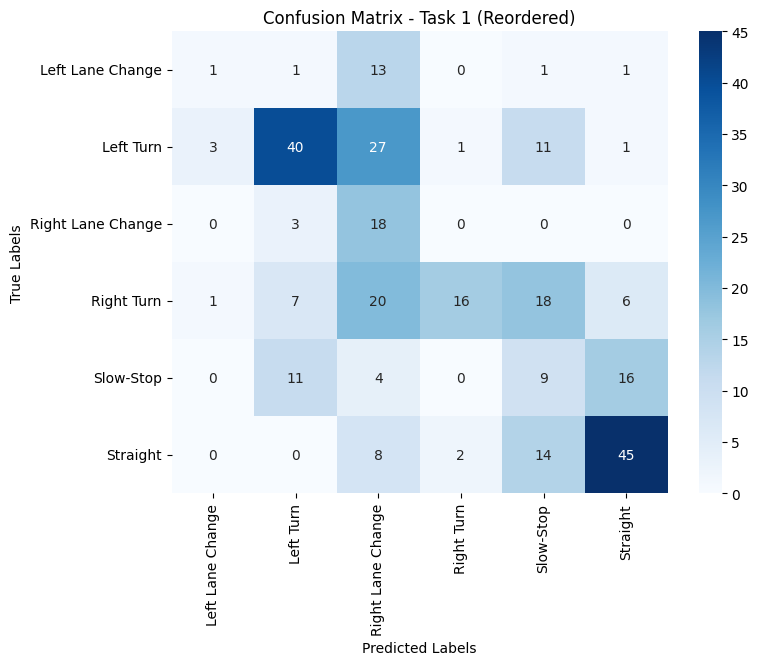

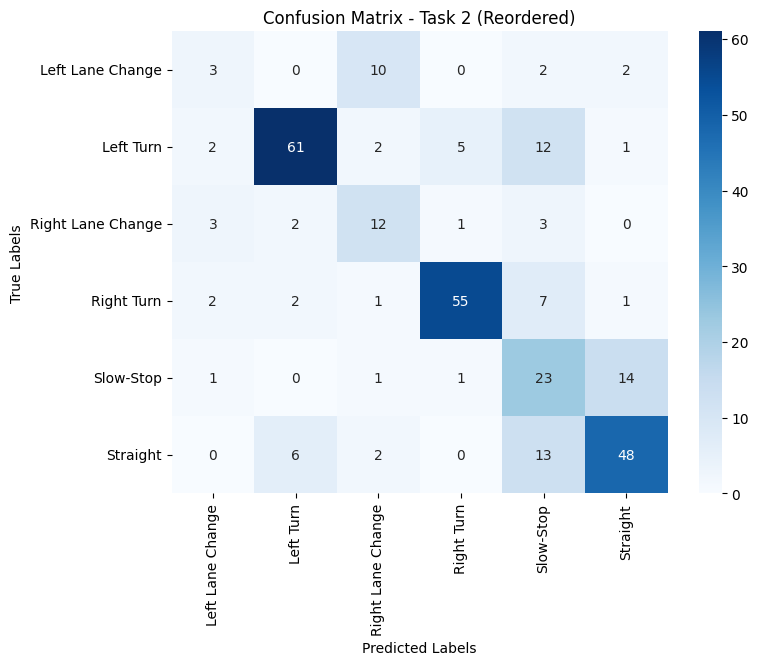

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# New order of class labels based on the reference image
new_class_labels = ['Left Lane Change', 'Left Turn', 'Right Lane Change', 'Right Turn', 'Slow-Stop', 'Straight']

# Convert true and predicted labels to their corresponding indices using the new order
y_test_indices_new_order = [new_class_labels.index(label) for label in y_test]
y_pred1_indices_new_order = [new_class_labels.index(label) for label in y_pred1]
y_pred2_indices_new_order = [new_class_labels.index(label) for label in y_pred2]

# Calculate confusion matrices using the new order
cm_task1_new_order = confusion_matrix(y_test_indices_new_order, y_pred1_indices_new_order, labels=range(len(new_class_labels)))
cm_task2_new_order = confusion_matrix(y_test_indices_new_order, y_pred2_indices_new_order, labels=range(len(new_class_labels)))

# Plot the confusion matrix for Task 1 with the new order
plt.figure(figsize=(8, 6))
sns.heatmap(cm_task1_new_order, annot=True, fmt='d', cmap='Blues', xticklabels=new_class_labels, yticklabels=new_class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Task 1 (Reordered)')
plt.savefig('task1.png')
plt.show()

# Plot the confusion matrix for Task 2 with the new order
plt.figure(figsize=(8, 6))
sns.heatmap(cm_task2_new_order, annot=True, fmt='d', cmap='Blues', xticklabels=new_class_labels, yticklabels=new_class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Task 2 (Reordered)')
plt.savefig('task2.png')
plt.show()
